# Step 1: Setup & Data Loading

In [70]:
# ─── 1. INSTALL & IMPORT ────────────────────────────────
# Install seaborn for extra plotting (only if needed)
!pip install -q numpy pandas matplotlib scikit-learn seaborn

You should consider upgrading via the '/Users/jidarwish/Documents/JNations-2025/env/bin/python3 -m pip install --upgrade pip' command.


In [124]:
# Standard data libraries
import pandas as pd
import numpy as np

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools from scikit-learn
from sklearn.model_selection import train_test_split

# TODO: Run this cell to load all the libraries

In [ ]:
# ─── 1. LOAD THE DATA ───────────────────────────────────
# URL of the Adult Income CSV (hosted on GitHub)
url = "https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/refs/heads/master/adult.csv"

# Read into a DataFrame
# df = pd.read_csv(url)
df = pd.read_csv("data/processed.csv")


df['income_higher_than_50k'] = df['income'].map({'<=50K':0, '>50K':1})
df = df.replace('?', np.nan) # This dataset uses '?' as a placeholder for missing data, let's use the best practices with np.nan

# TODO: Inspect the first rows to see columns and values
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_higher_than_50k
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,0


# Step 2: Exploratory Data Analysis (EDA)

In [126]:
# ─── 2.1 CHECK SHAPE & TYPES ─────────────────────────────
print("Records, Features:", df.shape)
df.info()
# TODO: Note which columns are numeric vs object (categorical)

Records, Features: (48842, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     48842 non-null  int64 
 1   workclass               46043 non-null  object
 2   fnlwgt                  48842 non-null  int64 
 3   education               48842 non-null  object
 4   educational-num         48842 non-null  int64 
 5   marital-status          48842 non-null  object
 6   occupation              46033 non-null  object
 7   relationship            48842 non-null  object
 8   race                    48842 non-null  object
 9   gender                  48842 non-null  object
 10  capital-gain            48842 non-null  int64 
 11  capital-loss            48842 non-null  int64 
 12  hours-per-week          48842 non-null  int64 
 13  native-country          47985 non-null  object
 14  income                 

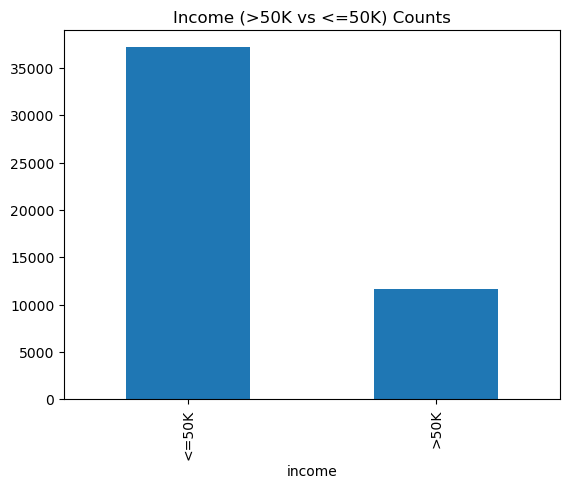

In [127]:
# ─── 2.2 TARGET DISTRIBUTION ────────────────────────────
df['income'].value_counts().plot(
    kind='bar', title='Income (>50K vs <=50K) Counts'
)
plt.show()
# TODO: What % earn >50K?

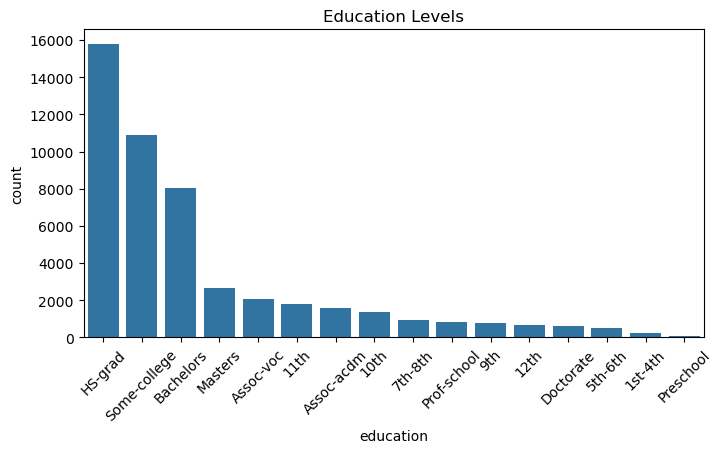

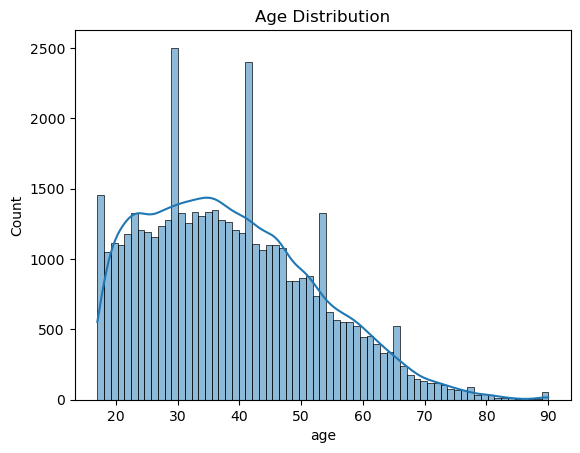

In [130]:
# ─── 2.3 FEATURE VISUALIZATIONS ─────────────────────────
# Categorical: education
plt.figure(figsize=(8,4))
sns.countplot(x='education', data=df,
              order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Education Levels")
plt.show()

# Numeric: age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# TODO: Which features look most imbalanced?

#### Correlation Matrix of Numeric Features

We often start by looking at how numeric features correlate with each other **and** with our target (`income`).  
High positive or negative correlations can hint at strong predictors or multicollinearity issues.


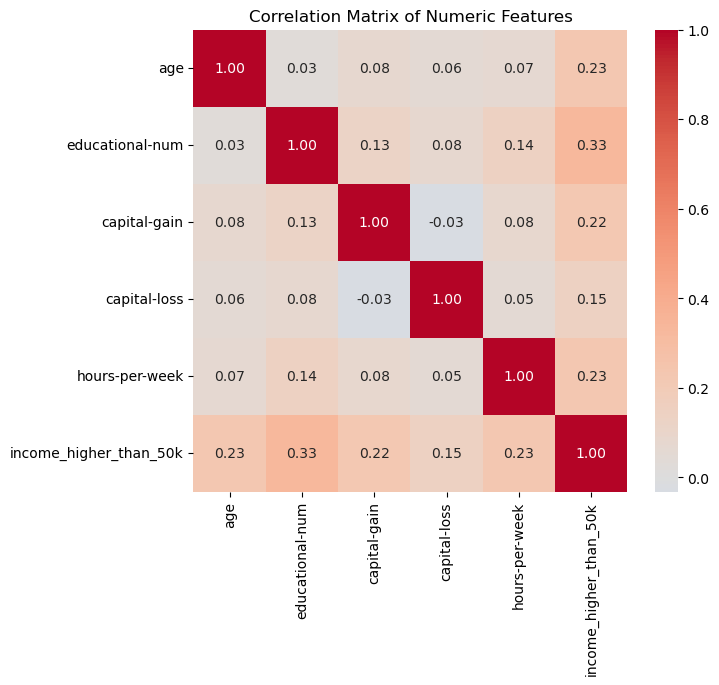

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns + our binary target
numeric_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
corr_df = df[numeric_cols + ['income_higher_than_50k']].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


#### Pairwise Relationships

A pairplot shows scatterplots for each pair of numeric features (and a histogram on the diagonal), colored by income category.  
This helps us visually detect patterns (e.g., high earners clustering by age/hours).


#### Boxplots for Capital Gain & Hours per Week

Boxplots give a concise summary of distribution (median, quartiles, outliers).  
- **Capital Gain:** Are high-income individuals earning dramatically more in capital gains?  
- **Hours/Week:** Do high earners work more hours on average?


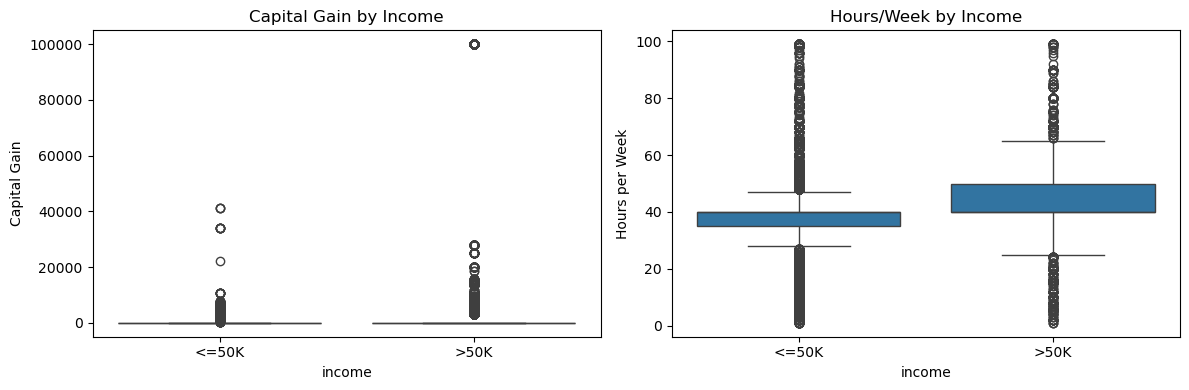

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(x='income', y='capital-gain', data=df, ax=axes[0])
axes[0].set_title("Capital Gain by Income")
axes[0].set_ylabel("Capital Gain")

sns.boxplot(x='income', y='hours-per-week', data=df, ax=axes[1])
axes[1].set_title("Hours/Week by Income")
axes[1].set_ylabel("Hours per Week")

plt.tight_layout()
plt.show()
# TODO @jidarwish should we keep this?

#### Income Proportions by Education Level

For a categorical feature, a **stacked bar chart** shows the proportion of each income class within each category.  
This reveals which education levels have higher fractions of >50K earners.


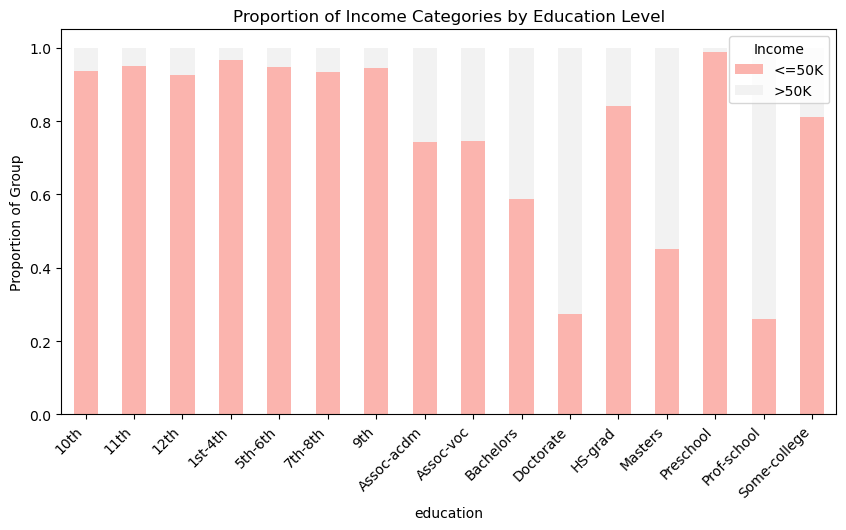

In [135]:
edu_prop = pd.crosstab(df['education'], df['income'], normalize='index')

edu_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(10,5),
    colormap='Pastel1'
)
plt.title("Proportion of Income Categories by Education Level")
plt.ylabel("Proportion of Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.show()


#### Age vs Hours-per-Week

A scatterplot of **age** against **hours-per-week**, colored by income, can show whether high earners cluster in certain age or work-hour ranges.


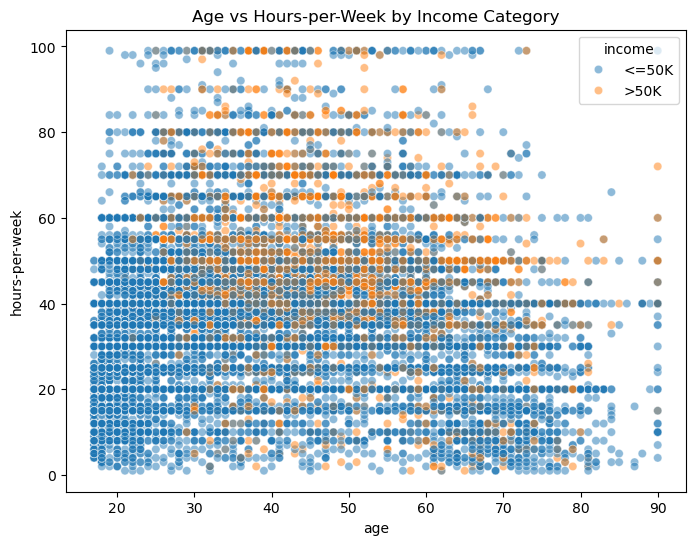

In [137]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='age', y='hours-per-week',
    hue='income', data=df, alpha=0.5
)
plt.title("Age vs Hours-per-Week by Income Category")
plt.show()


#### Marital Status Distribution among >50K Earners

Pie charts can quickly show which marital statuses are most common among high earners.


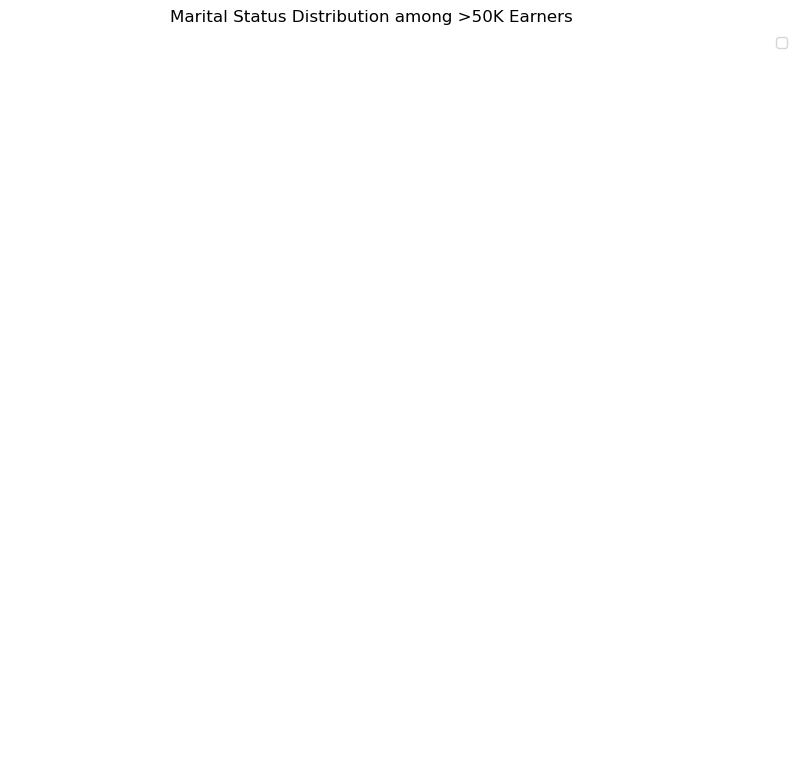

In [157]:
high_status = df[df['income']==1]['marital-status'].value_counts()

plt.figure(figsize=(8, 8))
high_status.plot(
    kind='pie',
    startangle=90,
    colormap='tab20',
    labels=None  # Hide labels on pie
)
plt.legend(labels=high_status.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("")
plt.title("Marital Status Distribution among >50K Earners")
plt.tight_layout()
plt.show()

#### Top 10 Occupations for >50K Earners

A horizontal bar chart of the most frequent occupations among high earners can highlight which roles are most associated with higher income.


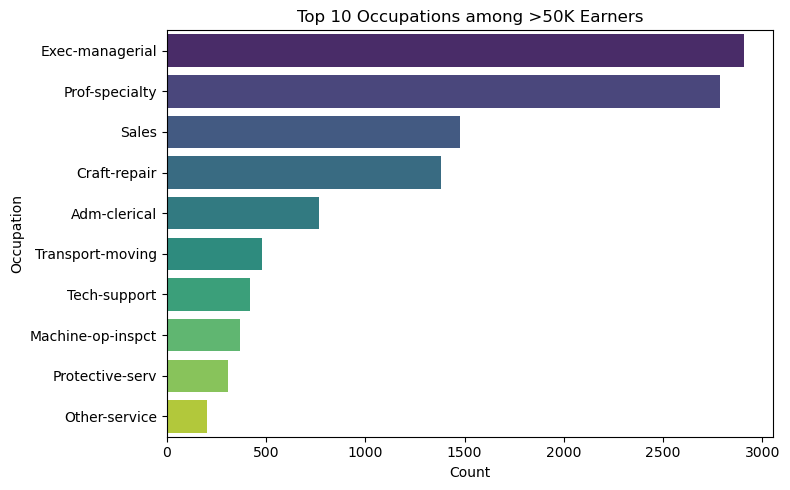

In [139]:
# Prepare data
top_occ = df[df['income'] == '>50K']['occupation'].value_counts().nlargest(10)
top_occ_df = top_occ.reset_index()
top_occ_df.columns = ['occupation', 'count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_occ_df,
    y='occupation',
    x='count',
    hue='occupation',      # required to use palette safely
    palette='viridis'
)
plt.title("Top 10 Occupations among >50K Earners")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()

### Why use?

- Correlation heatmap highlights which features move together—and how strongly they relate to the target.
- Pairplots reveal nonlinear patterns or clusters that may guide feature engineering.
- Boxplots and scatterplots help spot outliers and distribution differences between income groups.
- Stacked bars show category-level propensities.
- Pie and occupation charts give intuitive views of group makeup.

# Step 3: Data Preprocessing

In [140]:
# ─── 3.1 HANDLE MISSING VALUES ───────────────────────────
old_size = len(df)
print(f'size of dataset is {len(df)}')
print((df.isna()).sum()) # Check how many values are missing
df = df.dropna()         # simple drop for workshop
# TODO: How many rows were removed?
old_size - len(df) # TODO remove this maybe?

size of dataset is 48842
age                          0
workclass                 2799
fnlwgt                       0
education                    0
educational-num              0
marital-status               0
occupation                2809
relationship                 0
race                         0
gender                       0
capital-gain                 0
capital-loss                 0
hours-per-week               0
native-country             857
income                       0
income_higher_than_50k       0
dtype: int64


3620

In [141]:
# ─── 3.2 ENCODE CATEGORICALS ────────────────────────────
# We use one-hot encoding instead of numeric labels because decision trees split data based on feature values. 
# If we assign numbers like `Private = 1`, `State-gov = 2`, it introduces a fake order (e.g., 2 > 1), which misleads the model.
# This is called One-hot encoding and it avoids this by creating separate 0/1 columns for each category, 
# letting the tree split cleanly on exact matches without assuming any order.
# It's more accurate and reliable for decision trees.

cat_cols = df.select_dtypes('object').columns.drop('income')
df_enc = pd.get_dummies(df, columns=cat_cols)
# TODO: Inspect df_enc.columns to see new dummy columns
# TODO talk about this in terms of decision trees why this would be nice!
df_enc.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'income_higher_than_50k',
       'workclass_Federal-gov', 'workclass_Local-gov',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=106)

In [144]:
df_enc.head()


0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45222, dtype: object

In [41]:
# ─── 3.3 BINARY TARGET & SCALING ────────────────────────
# Convert target to 0/1
# df_enc['income'] = df['income'].map({'<=50K':0, '>50K':1})

# Scale numeric features
from sklearn.preprocessing import StandardScaler
num_cols = ['age','fnlwgt','educational-num',
            'capital-gain','capital-loss','hours-per-week']
scaler = StandardScaler()
df_enc[num_cols] = scaler.fit_transform(df_enc[num_cols])

In [148]:
# ─── 3.4 TRAIN/TEST SPLIT ────────────────────────────────
X_labels = df_enc.drop('income', axis=1)
X = X_labels.drop('income_higher_than_50k', axis=1)
y = df_enc['income_higher_than_50k']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
y
# TODO: What are the shapes of X_train and X_test?

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income_higher_than_50k, Length: 45222, dtype: int64

# Step 4: Model Training & Evaluation

In [149]:
# ─── 4.1 TRAIN MODEL ─────────────────────────────────────
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# TODO: This may take ~30 seconds – watch for convergence warnings.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [150]:
# ─── 4.2 PREDICT & ACCURACY ──────────────────────────────
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8404643449419569


In [151]:
# ─── 4.3 DETAILED METRICS ───────────────────────────────
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6842
           1       0.73      0.56      0.63      2203

    accuracy                           0.84      9045
   macro avg       0.80      0.74      0.76      9045
weighted avg       0.83      0.84      0.83      9045



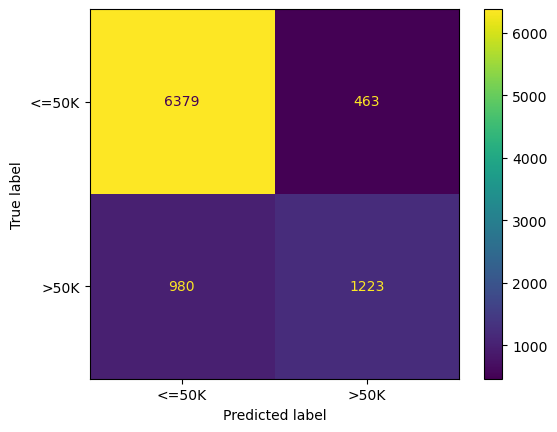

In [152]:
# ─── 4.4 CONFUSION MATRIX ───────────────────────────────
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['<=50K','>50K'])
disp.plot()
plt.show()
# TODO: Identify TP, FP, FN, TN cells

# Step 5: Simple Fairness Check

In [154]:
# ─── 5.1 EXTRACT GENDER INFO ─────────────────────────────
# We need the original 'sex' column before one-hot:
sex = df['gender']
# .reset_index(drop=True)
test_sex = sex[X_test.index]

# TODO: Ensure test_sex aligns with X_test indices

In [155]:
# ─── 5.2 GROUP METRICS ───────────────────────────────────
mask_m = (test_sex == 'Male')
mask_f = (test_sex == 'Female')

from sklearn.metrics import accuracy_score
acc_m = accuracy_score(y_test[mask_m], y_pred[mask_m])
acc_f = accuracy_score(y_test[mask_f], y_pred[mask_f])

print(f"Male accuracy:   {acc_m:.3f}")
print(f"Female accuracy: {acc_f:.3f}")
# TODO: Discuss why these may differ

Male accuracy:   0.801
Female accuracy: 0.923


## THIS IS TEMPORARY

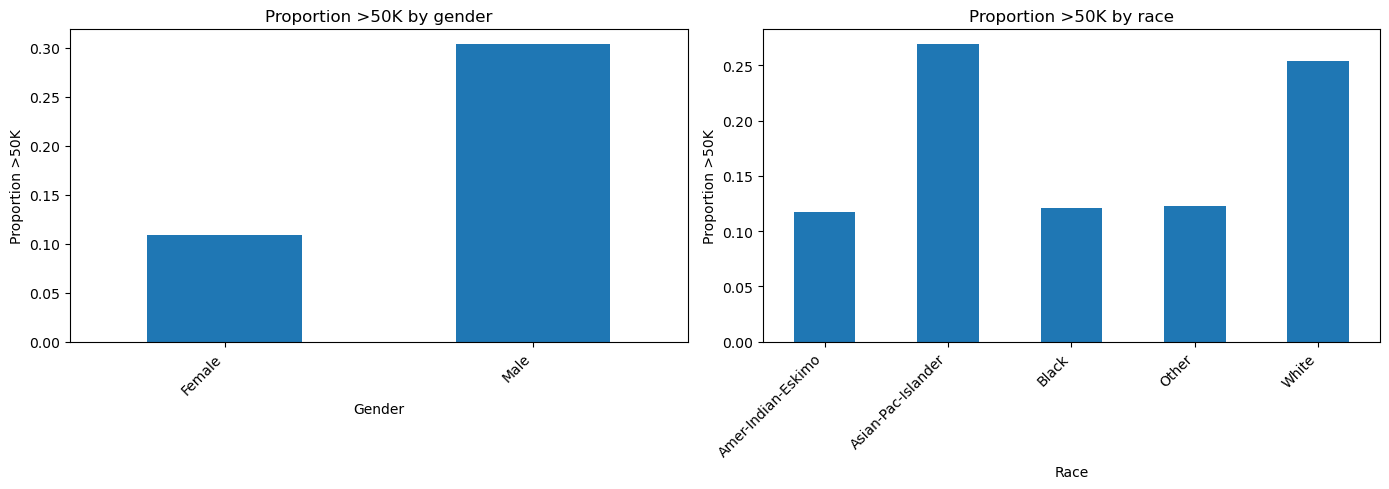

In [108]:
# ─── Define a reusable plotting function ────────────────────────────────
import matplotlib.pyplot as plt

def plot_percentage_by_group(ax, df, col_name, x_label=None, y_label=None):
    """
    Plots the percentage of people with income >50K for each category in `col_name`.
    
    ax        : a matplotlib Axes object
    df        : DataFrame containing 'incomeHigherThan50k' and col_name
    col_name  : the column to group by (e.g. 'sex' or 'race')
    x_label   : optional label for x-axis
    y_label   : optional label for y-axis
    """
    # Total count per group
    group_sizes = df.groupby(col_name).size()
    # Count of >50K per group
    higher_income = df[df['income'] == 1].groupby(col_name).size()
    # Compute proportions (fill missing groups with 0)
    percentages = (higher_income / group_sizes).fillna(0)
    
    # Plot as bar chart
    percentages.plot(
        kind='bar',
        ax=ax,
        title=f'Proportion >50K by {col_name}'
    )
    
    # Rotate and set tick labels
    ax.set_xticklabels(percentages.index.to_list(), rotation=45, ha='right')
    
    # Axis labels
    if x_label:
        ax.set_xlabel(x_label)
    if y_label:
        ax.set_ylabel(y_label)
# ─── Create side-by-side plots for Gender & Race ─────────────────────────
fig, axes = plt.subplots(ncols=2, figsize=(14,5))

plot_percentage_by_group(
    axes[0], df, 'gender',
    x_label='Gender', y_label='Proportion >50K'
)
plot_percentage_by_group(
    axes[1], df, 'race',
    x_label='Race', y_label='Proportion >50K'
)

plt.tight_layout()
plt.show()


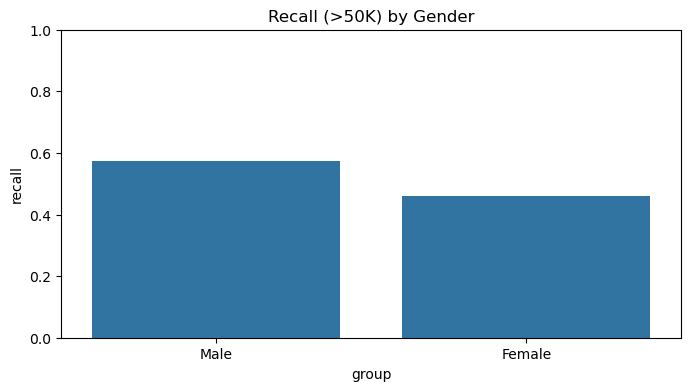

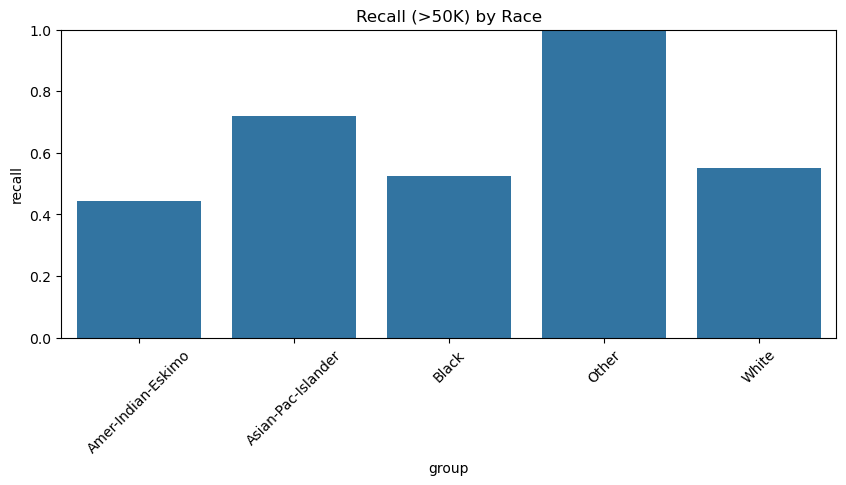

In [156]:
# ─── 1. FAIRNESS VISUALIZATION BY GENDER & RACE ──────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score

# Recover original sensitive attributes for the test set
sex_test = df.loc[X_test.index, 'gender']          # 'Male' or 'Female'
race_test = df.loc[X_test.index, 'race']        # e.g. 'White', 'Black', etc.

# Prepare a DataFrame to collect metrics
fairness_df = []

for group_name, group_series in [('Male', sex_test), ('Female', sex_test)]:
    mask = (sex_test == group_name)
    y_t, y_p = y_test[mask], y_pred[mask]
    fairness_df.append({
        'group': group_name,
        'type': 'gender',
        'accuracy': accuracy_score(y_t, y_p),
        'recall': recall_score(y_t, y_p, pos_label=1)
    })

for race in sorted(race_test.unique()):
    mask = (race_test == race)
    y_t, y_p = y_test[mask], y_pred[mask]
    fairness_df.append({
        'group': race,
        'type': 'race',
        'accuracy': accuracy_score(y_t, y_p),
        'recall': recall_score(y_t, y_p, pos_label=1)
    })

fair_df = pd.DataFrame(fairness_df)

# Plot accuracy and recall by gender
plt.figure(figsize=(8,4))
sns.barplot(data=fair_df[fair_df['type']=='gender'], x='group', y='recall')
plt.title('Recall (>50K) by Gender')
plt.ylim(0,1)
plt.show()

# Plot accuracy and recall by race
plt.figure(figsize=(10,4))
sns.barplot(data=fair_df[fair_df['type']=='race'], x='group', y='recall')
plt.xticks(rotation=45)
plt.title('Recall (>50K) by Race')
plt.ylim(0,1)
plt.show()


In [56]:
# ─── 2. DISPARITY METRICS ──────────────────────────────────
# Compute differences (male - female) and (max recall - min recall) for race
gender_metrics = fair_df[fair_df['type']=='gender'].set_index('group')
gender_gap = gender_metrics.loc['Male','recall'] - gender_metrics.loc['Female','recall']

race_metrics = fair_df[fair_df['type']=='race'].set_index('group')
race_gap = race_metrics['recall'].max() - race_metrics['recall'].min()

print(f"Recall gap (Male vs Female): {gender_gap:.3f}")
print(f"Recall gap (across races):   {race_gap:.3f}")
# Important to note: A gap > 0.1 often indicates a concerning disparity.

Recall gap (Male vs Female): 0.103
Recall gap (across races):   0.444


# Step 6: Prometheus #todo rename?

In [16]:
# Install prometheus_client library (if not installed)
!pip install prometheus_client

You should consider upgrading via the '/Users/jidarwish/Documents/JNations-2025/env/bin/python3 -m pip install --upgrade pip' command.


In [17]:
from prometheus_client import start_http_server, Gauge
import time
import random

# Create a gauge metric to track model accuracy
model_accuracy = Gauge('model_accuracy', 'Accuracy of the ML model')

# Start Prometheus server on port 8000
start_http_server(8000)
print("Prometheus metrics server running on port 8000...")

# Simulate updating accuracy periodically (example only)
while True:
    simulated_accuracy = random.uniform(0.8, 0.9)  # Simulate accuracy updates
    model_accuracy.set(simulated_accuracy)
    print(f"Updated accuracy metric: {simulated_accuracy:.3f}")
    time.sleep(10)  # Update every 10 seconds

Prometheus metrics server running on port 8000...
Updated accuracy metric: 0.862
Updated accuracy metric: 0.855
Updated accuracy metric: 0.896
Updated accuracy metric: 0.835
Updated accuracy metric: 0.811


KeyboardInterrupt: 

In [18]:
# Install MLflow
!pip install mlflow

import mlflow
from sklearn.linear_model import LogisticRegression

mlflow.start_run(run_name="LogisticRegression_Model")

# Train your logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_enc, y_train)

# Log parameters
mlflow.log_param("max_iter", 200)

# Log metrics
accuracy = model.score(X_test_enc, y_test)
mlflow.log_metric("accuracy", accuracy)

# Log the model itself
mlflow.sklearn.log_model(model, "logistic_model")

mlflow.end_run()

print("Model logged with MLflow")


     |████████████████████████████████| 29.0 MB 521 kB/s eta 0:00:01
     |████████████████████████████████| 102 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 25.9 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 32.1 MB 27.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 7.8 MB/s  eta 0:00:01
     |████████████████████████████████| 106 kB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 17.6 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 700 kB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 443 kB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 417 kB 21.6 MB/s eta 0:00:01
     |███████████████████████████████

ModuleNotFoundError: No module named 'mlflow'